In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt

env = gym.make('Pendulum-v0')
print env.observation_space, env.action_space

[2017-08-05 14:37:54,332] Making new env: Pendulum-v0


Box(3,) Box(1,)


In [2]:
MAX_EPI = 400
MAX_STEP = 200
LR_w = .001
LR_theta = .001
GAMMA = .9

In [3]:
w = np.random.rand(3,1)
theta = np.random.rand(3,1)

In [4]:
def choose_action(o):
    return np.dot(theta.T, o)

def value(o, a):
    return np.dot(np.dot(w.T, o).T, a)

# o x a
def dif_value_wrt_w(o, a):
    return np.dot(o, a.T)

# 1 x 1
def dif_value_wrt_a(o, a):
    return np.dot(o.T, w)

# 1 x o
def dif_action_wrt_theta(o):
    return o.T

print dif_value_wrt_w(np.random.rand(3,1),np.random.rand(1,1))

[[ 0.44306315]
 [ 0.48983754]
 [ 0.11210242]]


curr epi: 0
curr epi: 40
curr epi: 80
curr epi: 120
curr epi: 160
curr epi: 200
curr epi: 240
curr epi: 280
curr epi: 320
curr epi: 360


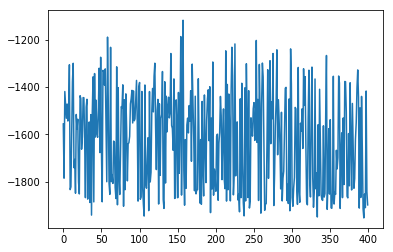

In [5]:
acc_r = []
for epi in range(MAX_EPI):
    o = env.reset().reshape(3,1)
    acc_r.append(0)
    if epi%(MAX_EPI/10)==0:
        print 'curr epi: {}'.format(epi)
    #for t in range(MAX_STEP):
    while True:

        #    env.render()
        a = choose_action(o)
        o_, r, done, info = env.step(a)
        o_ = o_.reshape(3,1)
        
        delta = r + GAMMA * value(o_, choose_action(o_)) - value(o, a)
        theta += LR_theta * np.dot(dif_value_wrt_a(o, a), dif_action_wrt_theta(o)).T
        w += LR_w * delta * dif_value_wrt_w(o, a)
        
        acc_r[-1] += r
        o = o_
        if done:
            break
    #print 'epi: {}, acc_r: {}'.format(epi, acc_r)
plt.plot(xrange(MAX_EPI), acc_r)
plt.show()
        

In [ ]:
a = np.array([[1,2,3],
          [4,5,6]])
b = np.array([[1,2],
          [4,5],
             [7,8]])
print a